Start this in your projectfolder in the terminal to be in the right development environment
pipenv install jupyter
pipenv shell
pipenv run jupyter notebook

In [1]:
import os
import requests 
import torch
import numpy as np
import pytorch_lightning as pl

from PIL import Image

from torch.utils.data import DataLoader, random_split
from torchvision import transforms

from dataset.dataset import download_data, LFWDataset
from models.face_net import FaceNet

from pytorch_lightning.loggers import TensorBoardLogger

In [2]:
url = "http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz"
download_data(url)

In [3]:
root = os.path.join('.', 'data', 'lfw-deepfunneled')
dataset = LFWDataset(root)

In [4]:
iterator = iter(dataset)
a, b, c, d = next(iterator)

Aaron_Peirsol


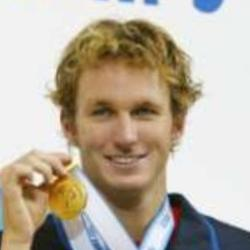

In [5]:
print(a)
transforms.ToPILImage()(b)

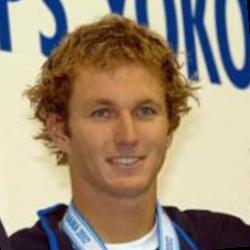

In [6]:
transforms.ToPILImage()(c)

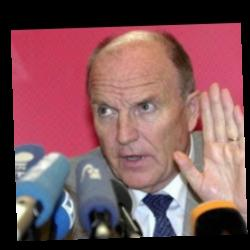

In [7]:
transforms.ToPILImage()(d)

In [3]:
from torch.utils.data import random_split

train_length = int(0.8 * len(dataset))
val_length = test_length = (len(dataset) - train_length) // 2

train_set, val_set, test_set = random_split(dataset, [train_length, val_length, test_length])

In [4]:
train_loader = DataLoader(train_set, batch_size=8, num_workers=0)
val_loader = DataLoader(val_set, batch_size=8, num_workers=0)
test_loader = DataLoader(test_set, batch_size=8, num_workers=0)

In [5]:
hparams = {'lr': 0.001, 'margin': 1}
model = FaceNet(hparams)

In [ ]:
tmp_set, _ = random_split(dataset, [10, (len(dataset)-10)])
tmp_loader = DataLoader(tmp_set, batch_size=1, num_workers=0)

In [6]:
logger = TensorBoardLogger('tb_logs', name='FaceNet on LFW')
trainer = pl.Trainer(gpus=1, max_epochs=55, logger=logger)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [7]:
#trainer.fit(model, tmp_loader)
trainer.fit(model, train_loader, val_loader)


  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNet            | 40.5 M
1 | cnn       | Sequential        | 23.5 M
2 | criterion | TripletMarginLoss | 0     
------------------------------------------------
40.5 M    Trainable params
0         Non-trainable params
40.5 M    Total params


1

In [8]:
torch.save(model.state_dict(), 'FaceNetOnLFW.pth')

In [10]:
trainer.test(model, test_loader)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.7452, device='cuda:0'),
 'val_loss': tensor(0.5357, device='cuda:0')}
--------------------------------------------------------------------------------


[{'test_loss': 0.7452296018600464, 'val_loss': 0.535677433013916}]